## Perceptron Learning Rule

In [ ]:
import torch as tc
import torch.nn as nn

tensor([[0.2514]], grad_fn=<AddmmBackward0>)

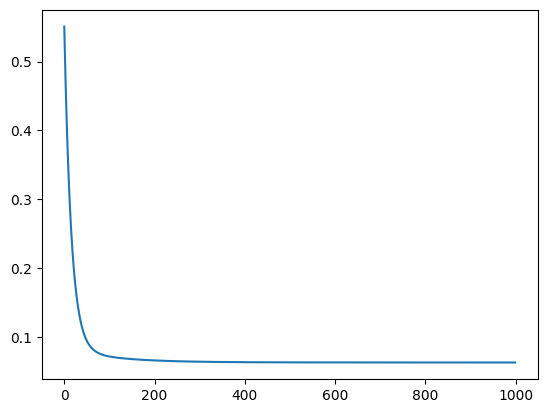

In [ ]:
import torch as tc
import torch.nn as nn

class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc(x)
        return x

d_x = tc.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tc.float32)
d_y = tc.tensor([0, 1, 1, 1], dtype=tc.float32).view(-1, 1)

model = Perceptron()

loss_fn = nn.MSELoss()
optimizer = tc.optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
l=[]
for epoch in range(epochs):

    outputs = model(d_x)

    loss = loss_fn(outputs, d_y)
    l.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



plt.plot(range(epochs), l)
temp = tc.tensor([[0,0]], dtype=tc.float32)
model(temp)
# # Test the trained model
# with tc.no_grad():
#     test_inputs = tc.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tc.float32)
#     predictions = model(test_inputs)
#     print("Predictions:")
#     print(predictions)


## Rough:

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=cb28ea95ceb33d709da1c65c93f26fd5aa8edf0a4f4a093ca22c5fff99bf76cf
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


RANGE :  [ 0  1  2  3  4  5  6  7  8  9 10]
TRAPMF :  [0.  0.  0.  0.5 1.  1.  1.  1.  0.5 0.  0. ]
Defuzzified by bisector technique: 5.5
Defuzzified by mean of the greatest strategy:  5.5


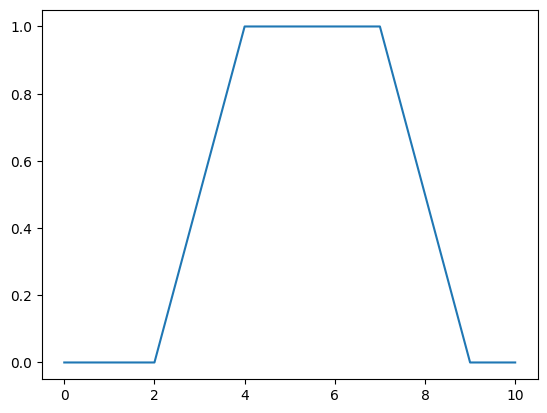

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(0, 11, 1)
print("RANGE : ", x)
trapmf = fuzz.trapmf(x, [2, 4, 7, 9])
print("TRAPMF : ",trapmf)
plt.plot(x, trapmf)

bisector = fuzz.defuzz(x, trapmf,'bisector')
mean_greatest = fuzz.defuzz(x, trapmf, 'mom')

print("Defuzzified by bisector technique:", bisector)
print("Defuzzified by mean of the greatest strategy: ",mean_greatest)